In [496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [497]:
df=pd.read_csv("mobile_prices_2023.csv")
df

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17


In [498]:
df.shape

(1836, 11)

In [499]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')

# Data Cleaning


In [500]:
df.duplicated().sum()

69

In [501]:
df = df.drop_duplicates()
df.duplicated().sum()
df.shape

(1767, 11)

In [502]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          162
Back/Rare Camera       8
Front Camera         381
Battery                9
Processor             49
Price in INR           0
Date of Scraping       0
dtype: int64

In [503]:
df = df.dropna()
df.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [504]:

df.rename(columns={'Phone Name': 'Nama HP','Rating ?/5':'Rating','Number of Ratings':'Banyak Rating' ,'ROM/Storage': 'ROM', 'Back/Rare Camera': 'Back Camera'}, inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nama HP           1252 non-null   object 
 1   Rating            1252 non-null   float64
 2   Banyak Rating     1252 non-null   object 
 3   RAM               1252 non-null   object 
 4   ROM               1252 non-null   object 
 5   Back Camera       1252 non-null   object 
 6   Front Camera      1252 non-null   object 
 7   Battery           1252 non-null   object 
 8   Processor         1252 non-null   object 
 9   Price in INR      1252 non-null   object 
 10  Date of Scraping  1252 non-null   object 
dtypes: float64(1), object(10)
memory usage: 117.4+ KB


# EDA / Pre-processing

In [505]:
drop_date = ['Date of Scraping']
df.drop(columns=drop_date, inplace=True)

In [506]:
df['Nama HP']

0                   POCO C50 (Royal Blue, 32 GB)
1                  POCO M4 5G (Cool Blue, 64 GB)
2                   POCO C51 (Royal Blue, 64 GB)
3                    POCO C55 (Cool Blue, 64 GB)
4                  POCO C51 (Power Black, 64 GB)
                          ...                   
1831        Infinix Note 7 (Forest Green, 64 GB)
1832        Infinix Note 7 (Bolivia Blue, 64 GB)
1833        Infinix Note 7 (Aether Black, 64 GB)
1834    Infinix Zero 8i (Silver Diamond, 128 GB)
1835            Infinix S5 (Quetzal Cyan, 64 GB)
Name: Nama HP, Length: 1252, dtype: object

In [507]:
df['Nama HP'] = df['Nama HP'].str.split().str[0]


In [508]:
df.dtypes

Nama HP           object
Rating           float64
Banyak Rating     object
RAM               object
ROM               object
Back Camera       object
Front Camera      object
Battery           object
Processor         object
Price in INR      object
dtype: object

In [509]:
df['Banyak Rating'] = df['Banyak Rating'].str.replace(',', '').astype(int)

In [510]:
df['RAM'].value_counts()

4 GB RAM      341
8 GB RAM      338
6 GB RAM      265
3 GB RAM      153
2 GB RAM       90
12 GB RAM      46
1 GB RAM       12
512 MB RAM      4
8 MB RAM        1
16 MB RAM       1
1.5 GB RAM      1
Name: RAM, dtype: int64

In [511]:

df['RAM'] = df['RAM'].str.split().str[0]
df['RAM'] = df['RAM'].str.replace('1.5','2')
df['RAM'].fillna(0, inplace=True)
df['RAM'] = df['RAM'].astype(int)



C:\Users\alfar\AppData\Local\Temp\ipykernel_22516\1836196982.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['RAM'] = df['RAM'].str.replace('1.5','2')


In [512]:
df

,Nama HP,Rating,Banyak Rating,RAM,ROM,Back Camera,Front Camera,Battery,Processor,Price in INR
0,POCO,4.2,33561,2,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,POCO,4.2,77128,4,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,POCO,4.3,15175,4,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,POCO,4.2,22621,4,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,POCO,4.3,15175,4,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1832,Infinix,4.3,25582,4,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1833,Infinix,4.3,25582,4,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1834,Infinix,4.2,7117,8,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999"


In [513]:

df['ROM'].value_counts()

128 GB ROM    541
64 GB ROM     355
32 GB ROM     179
256 GB ROM    126
16 GB ROM      31
8 GB ROM        9
4 GB ROM        5
512 GB ROM      4
0 GB ROM        1
NA ROM          1
Name: ROM, dtype: int64

In [514]:
df['ROM'] = df['ROM'].str.split().str[0]
df['ROM'] = df['ROM'].str.replace('NA','0')
df['ROM'].fillna(0, inplace=True)
df['ROM'] = df['ROM'].astype(int)

In [515]:
df

,Nama HP,Rating,Banyak Rating,RAM,ROM,Back Camera,Front Camera,Battery,Processor,Price in INR
0,POCO,4.2,33561,2,32,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,POCO,4.2,77128,4,64,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,POCO,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,POCO,4.2,22621,4,64,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,POCO,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1832,Infinix,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1833,Infinix,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1834,Infinix,4.2,7117,8,128,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999"


In [516]:
df['Back Camera'].value_counts()

13MP + 2MP                             77
64MP + 8MP + 2MP                       76
50MP + 2MP + 2MP                       76
50MP + 2MP                             69
8MP Rear Camera                        65
                                       ..
108MP + 8MP + 16MP                      1
16MP + 2MP + 2MP                        1
48MP +8MP+16MP                          1
24MP + 8MP + 2MP                        1
16MP + 5MP + 2MP + Low Light Sensor     1
Name: Back Camera, Length: 147, dtype: int64

In [517]:

df['Size Cam Blkg'] = df['Back Camera'].str.split().str[0].str.replace('MP', '').str.replace('Mp', '')
df['Size Cam Blkg'] = df['Size Cam Blkg'].str.replace('12.2','12').str.replace('12.3','12').str.replace('0.3','1').astype(int)

def hitung_cam(string_cam):
    if "Dual" in string_cam:
        return 2
    else:
        hitung_plus = string_cam.count('+')
        return hitung_plus + 1

df['Total Cam Blkg'] = df['Back Camera'].apply(lambda x: hitung_cam(x))

drpro = ['Back Camera']
df.drop(columns=drpro, inplace=True)


C:\Users\alfar\AppData\Local\Temp\ipykernel_22516\2398481504.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Size Cam Blkg'] = df['Size Cam Blkg'].str.replace('12.2','12').str.replace('12.3','12').str.replace('0.3','1').astype(int)


In [518]:
df

,Nama HP,Rating,Banyak Rating,RAM,ROM,Front Camera,Battery,Processor,Price in INR,Size Cam Blkg,Total Cam Blkg
0,POCO,4.2,33561,2,32,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",8,2
1,POCO,4.2,77128,4,64,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",50,2
2,POCO,4.3,15175,4,64,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",8,2
3,POCO,4.2,22621,4,64,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",50,2
4,POCO,4.3,15175,4,64,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",8,2
...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4
1832,Infinix,4.3,25582,4,64,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4
1833,Infinix,4.3,25582,4,64,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4
1834,Infinix,4.2,7117,8,128,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",48,4


In [519]:
df['Size Cam Dpn'] = df['Front Camera'].str.split().str[0].str.replace('MP', '').str.replace('Mp', '')
df['Size Cam Dpn'] = df['Size Cam Dpn'].str.replace('10.8', '11').str.replace('0.3', '1').str.replace('1.6', '2').str.replace('1.3', '1')
df['Size Cam Dpn'].fillna(0, inplace=True)

df['Size Cam Dpn']=df['Size Cam Dpn'].astype(int)

def hitung_camera(string_cam):
    if "Dual" in string_cam:
        return 2
    else:
        
        return 1

df['Total Cam Dpn'] = df['Front Camera'].apply(lambda x: hitung_camera(x))

drpro = ['Front Camera']
df.drop(columns=drpro, inplace=True)

C:\Users\alfar\AppData\Local\Temp\ipykernel_22516\1639161370.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Size Cam Dpn'] = df['Size Cam Dpn'].str.replace('10.8', '11').str.replace('0.3', '1').str.replace('1.6', '2').str.replace('1.3', '1')


In [520]:
df

,Nama HP,Rating,Banyak Rating,RAM,ROM,Battery,Processor,Price in INR,Size Cam Blkg,Total Cam Blkg,Size Cam Dpn,Total Cam Dpn
0,POCO,4.2,33561,2,32,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",8,2,5,1
1,POCO,4.2,77128,4,64,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",50,2,8,1
2,POCO,4.3,15175,4,64,5000 mAh,Helio G36 Processor,"₹6,999",8,2,5,1
3,POCO,4.2,22621,4,64,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",50,2,5,1
4,POCO,4.3,15175,4,64,5000 mAh,Helio G36 Processor,"₹6,999",8,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4,16,1
1832,Infinix,4.3,25582,4,64,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4,16,1
1833,Infinix,4.3,25582,4,64,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4,16,1
1834,Infinix,4.2,7117,8,128,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",48,4,16,2


In [521]:
df['Battery'].unique()

array(['5000 mAh', '4500 mAh', '4000 mAh', '5160 mAh', '6000 mAh',
       '5065 mAh', '4200 mAh', '4300 mAh', '4230 mAh', '800 mAh',
       '3300 mAh', '3900 mAh', '4700 mAh', '3700 mAh', '3000 mAh',
       '7000 mAh', '2600 mAh', '4800 mAh', '4015 mAh', '4025 mAh',
       '3400 mAh', '4350 mAh', '4310 mAh', '3200 mAh', '4020 mAh',
       '4410 mAh', '4270 mAh', '4926 mAh', '2915 mAh', '4600 mAh',
       '4030 mAh', '4050 mAh', '4810 mAh', '4830 mAh', '4870 mAh',
       '4450 mAh', '3315 mAh', '3225 mAh', '3260 mAh', '4250 mAh',
       '4520 mAh', '3080 mAh', '3120 mAh', '2000 mAh', '4100 mAh',
       '4850 mAh', '3030 mAh', '3010 mAh', '4820 mAh', '4780 mAh',
       '5300 mAh', '5050 mAh', '3060 mAh', '4950 mAh', '2150 mAh',
       '1020 mAh', '4400 mAh', '4610 mAh', '4115 mAh', '3800 mAh',
       '4085 mAh', '2100 mAh', '3340 mAh', '3450 mAh', '2300 mAh',
       '2200 mAh', '2610 mAh', '2580 mAh', '1500 mAh', '1800 mAh',
       '2500 mAh', '3760 mAh', '3500 mAh', '5200 mAh'], dtype=o

In [522]:
df['Battery']=df['Battery'].str.replace('mAh','').astype(float)

def pilah_pro(pro):
    if 5000 <= pro < 5500:
        return '5000'
    elif 5500 <= pro < 6000:
        return '5500'
    elif 4000 <= pro < 4500:
        return '4000'
    elif 4500 <= pro < 5000:
        return '4500'
    elif 2000 <= pro < 2500:
        return '2000'
    elif 2500 <= pro < 3000:
        return '2500'
    elif 1000 <= pro < 1500:
        return '1000'
    elif 1500 <= pro < 1900:
        return '1500'

df['Battery'] = df['Battery'].apply(pilah_pro)

df['Battery'].fillna(0, inplace=True)
df['Battery']=df['Battery'].astype(int)


In [523]:
df['Price in INR']=df['Price in INR'].str.replace('₹','').str.replace(',','').astype(float)

In [524]:
df['Processor'].unique()

array(['Mediatek Helio A22 Processor, Upto 2.0 GHz Processor',
       'Mediatek Dimensity 700 Processor', 'Helio G36 Processor',
       'Mediatek Helio G85 Processor', 'Mediatek Helio G99 Processor',
       'Mediatek Helio G96 Processor',
       'Qualcomm Snapdragon 695 Processor',
       'Mediatek Dimensity 810 Processor',
       'Qualcomm Snapdragon 778G Processor',
       'MediaTek Dimensity 700 Processor',
       'Qualcomm Snapdragon 695 5G Processor',
       'Qualcomm Snapdragon 7+ Gen 2 (4nm) Processor',
       'MediaTek Helio G35 Processor',
       'Qualcomm Snapdragon 730G Processor', 'MediaTek G35 Processor',
       'Qualcomm Snapdragon 845 Processor',
       'Qualcomm Snapdragon 870 Processor',
       'Mediatek Helio G35 Processor', 'MediaTek Helio G80 Processor',
       'Qualcomm Snapdragon 720G Processor',
       'Qualcomm Snapdragon 860 Processor',
       'Qualcomm Snapdragon 662 Processor',
       'Qualcomm Snapdragon 732G Processor',
       'MediaTek Dimensity 1200 Proce

In [525]:
df['Upd_Processor'] = df['Processor'].str.split().str[0]

def pilah_pro(pro):
    if pro == 'Qualcomm' or pro == 'Qualcomm®' or pro == 'Snapdragon' or pro == '2nd-gen':
        return 'Snapdragon'
    elif pro == 'Mediatek' or pro == 'MediaTek' or pro == 'Meditek' or pro == 'Helio':
        return 'Mediatek'
    elif pro == 'Octa-core(EXYNOS)' or pro == 'Exynos':
        return 'Exynos'
    elif pro == '1':
        return 'IOS'
    elif pro == 'HUAWEI' or pro =='Kirin' :
        return 'Huawei'
    elif pro == 'Google':
        return 'Google'
    else :
        return 'Other'


df['Upd_Processor'] = df['Upd_Processor'].apply(pilah_pro)

drpro = ['Processor']
df.drop(columns=drpro, inplace=True)

df['Upd_Processor'].value_counts()




Mediatek      497
Snapdragon    460
Other         206
Exynos         50
IOS            24
Google         11
Huawei          4
Name: Upd_Processor, dtype: int64

<AxesSubplot:>

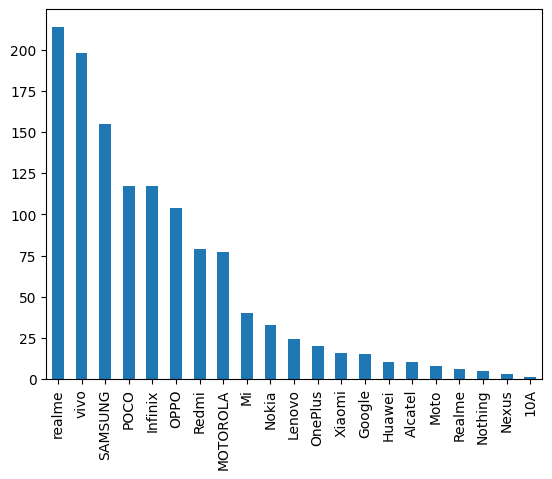

In [526]:
df['Nama HP'].value_counts().plot(kind='bar')

d:\TEL-U\LAB\MBC\TUGAS REKRU\MOBILE PRICES\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price in INR', ylabel='Density'>

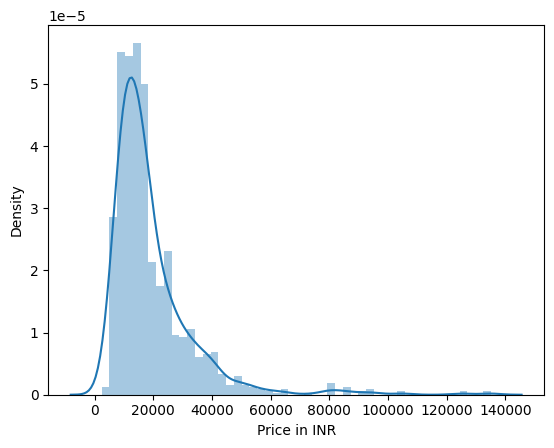

In [527]:
sns.distplot(df['Price in INR'])

<AxesSubplot:>

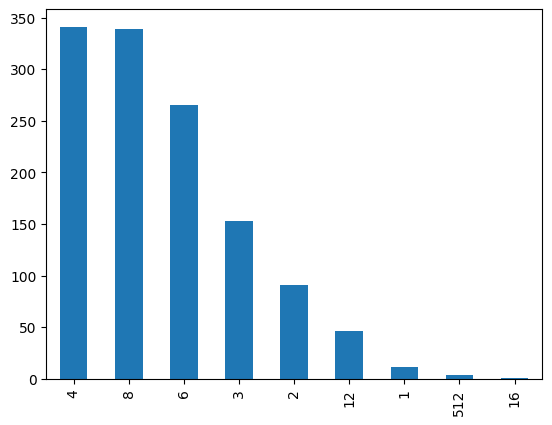

In [528]:
df['RAM'].value_counts().plot(kind='bar')

<AxesSubplot:>

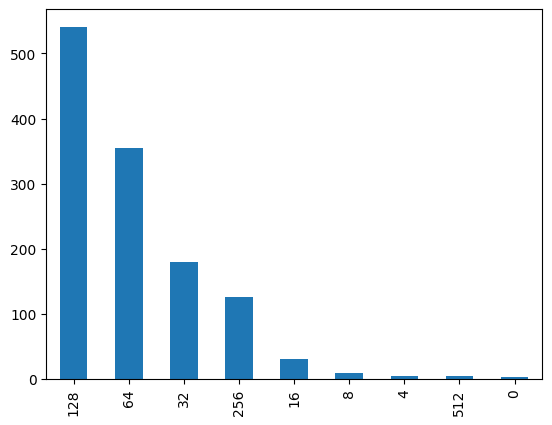

In [529]:
df['ROM'].value_counts().plot(kind='bar')

<AxesSubplot:>

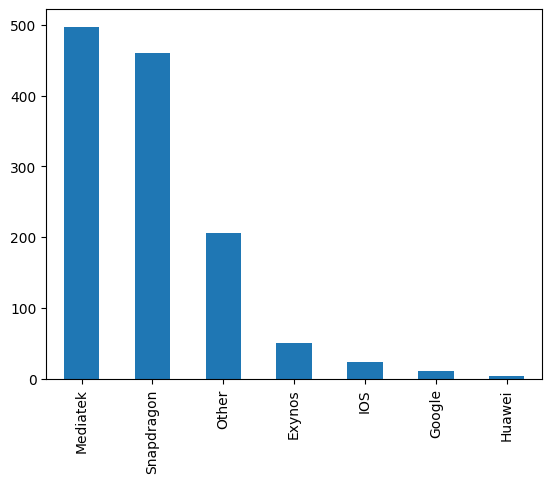

In [530]:
df['Upd_Processor'].value_counts().plot(kind='bar')

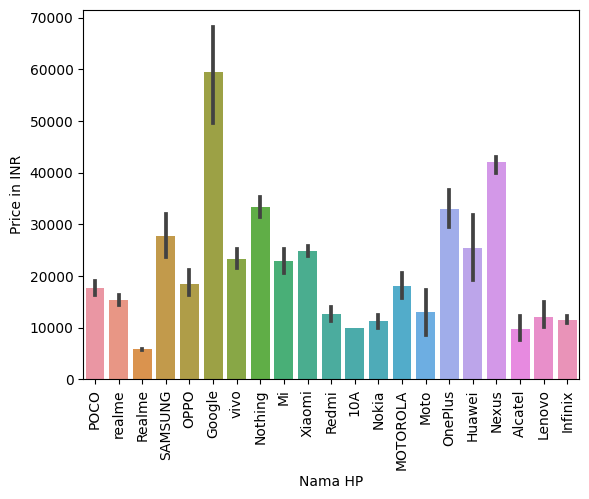

In [531]:
sns.barplot(x=df['Nama HP'], y=df['Price in INR'])
plt.xticks(rotation='vertical')
plt.show()

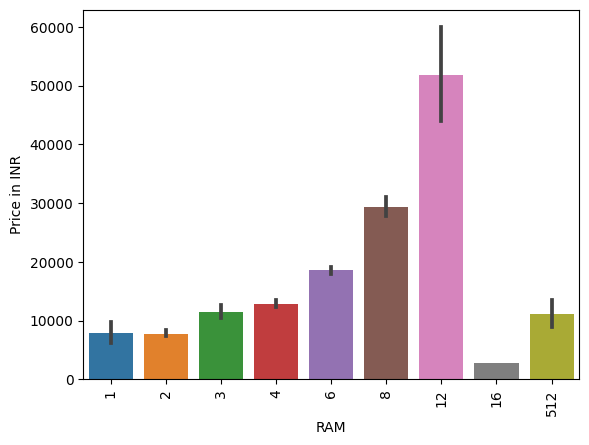

In [532]:
sns.barplot(x=df['RAM'], y=df['Price in INR'])
plt.xticks(rotation='vertical')
plt.show()

In [533]:
df = df[df["RAM"] <= 12]
df['RAM'].value_counts()

4     341
8     339
6     265
3     153
2      91
12     46
1      12
Name: RAM, dtype: int64

C:\Users\alfar\AppData\Local\Temp\ipykernel_22516\3329040595.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15})


<AxesSubplot:>

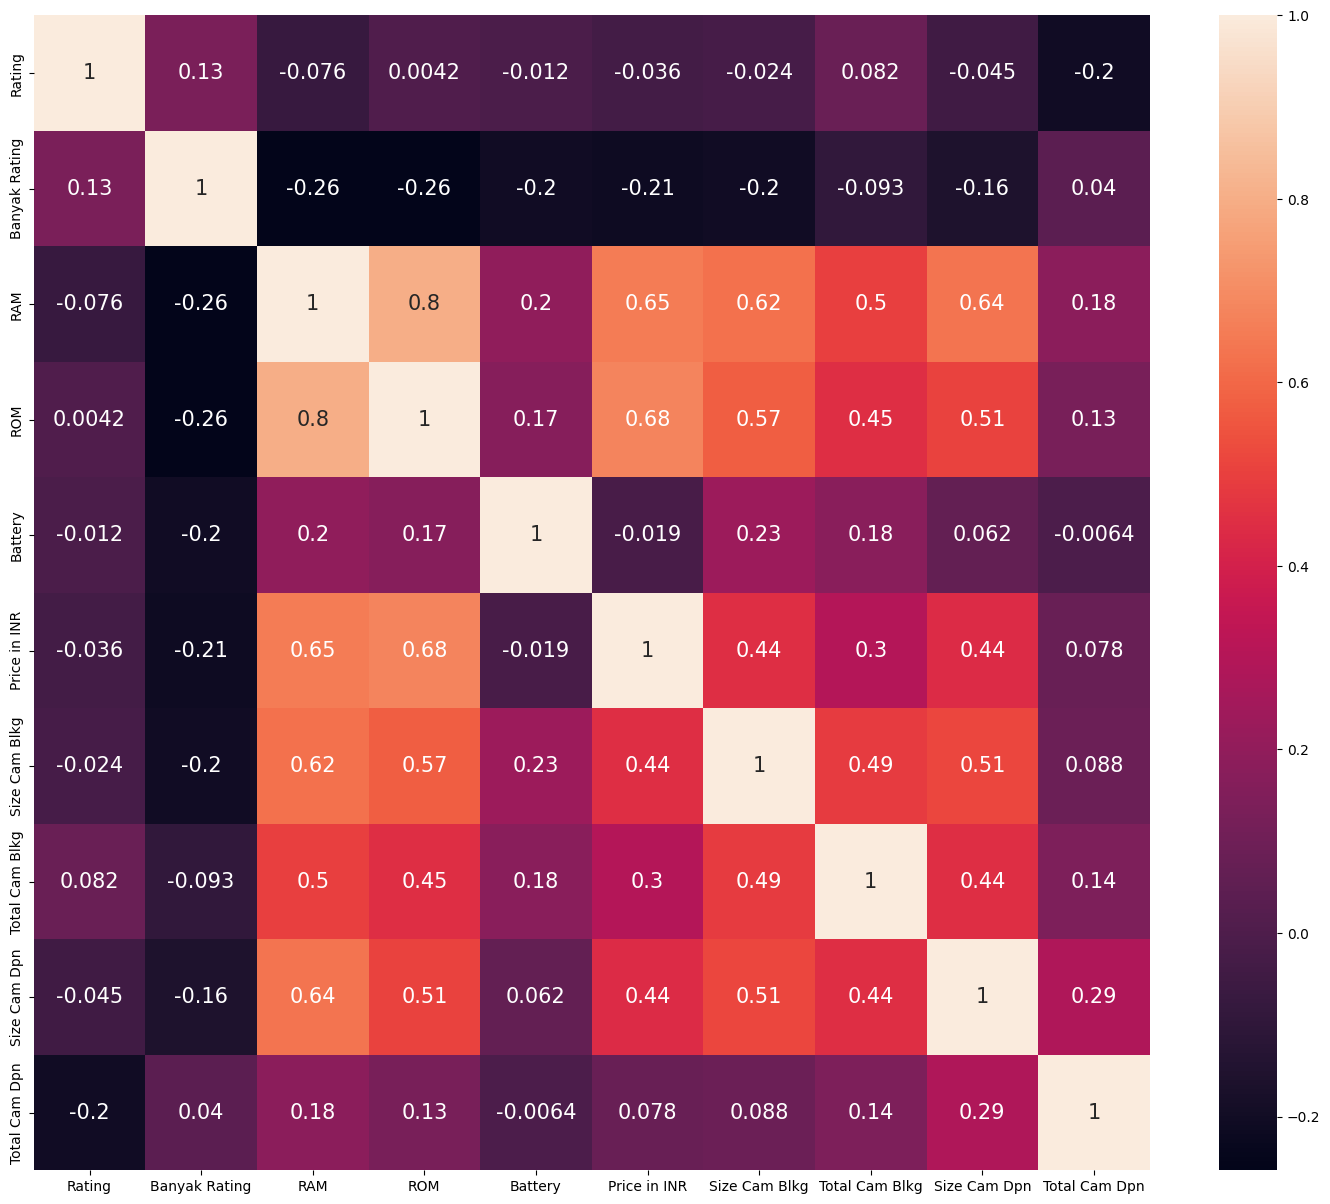

In [534]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15})

In [535]:
drpro = ['Banyak Rating']
df.drop(columns=drpro, inplace=True)

C:\Users\alfar\AppData\Local\Temp\ipykernel_22516\2411810769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=drpro, inplace=True)


d:\TEL-U\LAB\MBC\TUGAS REKRU\MOBILE PRICES\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price in INR', ylabel='Density'>

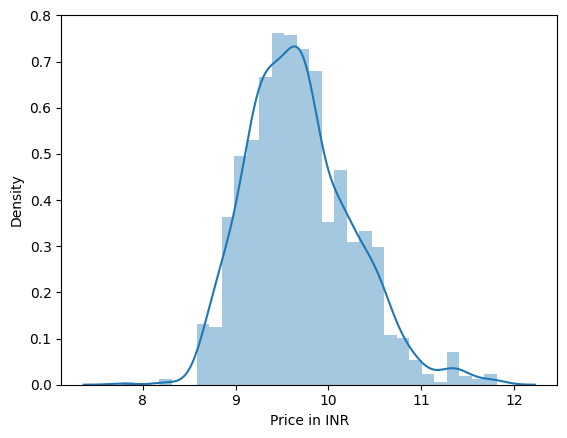

In [536]:
sns.distplot(np.log(df['Price in INR']))

In [537]:
swap = 'Price in INR'

kolom = df.pop(swap)
df['Price in INR'] = kolom

C:\Users\alfar\AppData\Local\Temp\ipykernel_22516\3546091709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price in INR'] = kolom


In [538]:
df['IDR'] = (df['Price in INR'] * 183).round(2)
drprice = ['Price in INR']
df.drop(columns=drprice, inplace=True)


C:\Users\alfar\AppData\Local\Temp\ipykernel_22516\3701326088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IDR'] = (df['Price in INR'] * 183).round(2)
C:\Users\alfar\AppData\Local\Temp\ipykernel_22516\3701326088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=drprice, inplace=True)


In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama HP         1247 non-null   object 
 1   Rating          1247 non-null   float64
 2   RAM             1247 non-null   int32  
 3   ROM             1247 non-null   int32  
 4   Battery         1247 non-null   int32  
 5   Size Cam Blkg   1247 non-null   int32  
 6   Total Cam Blkg  1247 non-null   int64  
 7   Size Cam Dpn    1247 non-null   int32  
 8   Total Cam Dpn   1247 non-null   int64  
 9   Upd_Processor   1247 non-null   object 
 10  IDR             1247 non-null   float64
dtypes: float64(2), int32(5), int64(2), object(2)
memory usage: 92.6+ KB


In [540]:
df

,Nama HP,Rating,RAM,ROM,Battery,Size Cam Blkg,Total Cam Blkg,Size Cam Dpn,Total Cam Dpn,Upd_Processor,IDR
0,POCO,4.2,2,32,5000,8,2,5,1,Mediatek,1033767.0
1,POCO,4.2,4,64,5000,50,2,8,1,Mediatek,2195817.0
2,POCO,4.3,4,64,5000,8,2,5,1,Mediatek,1280817.0
3,POCO,4.2,4,64,5000,50,2,5,1,Mediatek,1418067.0
4,POCO,4.3,4,64,5000,8,2,5,1,Mediatek,1280817.0
...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,4,64,5000,48,4,16,1,Mediatek,2744817.0
1832,Infinix,4.3,4,64,5000,48,4,16,1,Mediatek,2744817.0
1833,Infinix,4.3,4,64,5000,48,4,16,1,Mediatek,2744817.0
1834,Infinix,4.2,8,128,4500,48,4,16,2,Mediatek,3476817.0


# Modelling 

In [541]:
df

,Nama HP,Rating,RAM,ROM,Battery,Size Cam Blkg,Total Cam Blkg,Size Cam Dpn,Total Cam Dpn,Upd_Processor,IDR
0,POCO,4.2,2,32,5000,8,2,5,1,Mediatek,1033767.0
1,POCO,4.2,4,64,5000,50,2,8,1,Mediatek,2195817.0
2,POCO,4.3,4,64,5000,8,2,5,1,Mediatek,1280817.0
3,POCO,4.2,4,64,5000,50,2,5,1,Mediatek,1418067.0
4,POCO,4.3,4,64,5000,8,2,5,1,Mediatek,1280817.0
...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,4,64,5000,48,4,16,1,Mediatek,2744817.0
1832,Infinix,4.3,4,64,5000,48,4,16,1,Mediatek,2744817.0
1833,Infinix,4.3,4,64,5000,48,4,16,1,Mediatek,2744817.0
1834,Infinix,4.2,8,128,4500,48,4,16,2,Mediatek,3476817.0


In [542]:
X = df.drop(columns=['IDR'])
y = np.log(df['IDR'])

In [543]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [544]:
X_train

,Nama HP,Rating,RAM,ROM,Battery,Size Cam Blkg,Total Cam Blkg,Size Cam Dpn,Total Cam Dpn,Upd_Processor
52,POCO,4.3,3,32,5000,13,3,5,1,Mediatek
993,vivo,4.4,6,128,5000,50,3,16,1,Snapdragon
813,OPPO,4.3,8,128,4000,48,4,16,2,Mediatek
680,SAMSUNG,4.2,4,128,5000,13,2,5,1,Mediatek
1202,Mi,4.2,2,16,0,13,1,5,1,Snapdragon
...,...,...,...,...,...,...,...,...,...,...
987,vivo,4.3,3,64,5000,13,2,8,1,Snapdragon
1230,Redmi,4.4,4,64,4000,48,2,13,1,Snapdragon
1664,Huawei,4.2,1,4,2000,5,1,1,1,Other
246,realme,4.5,4,64,5000,48,3,16,1,Mediatek


In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama HP         1247 non-null   object 
 1   Rating          1247 non-null   float64
 2   RAM             1247 non-null   int32  
 3   ROM             1247 non-null   int32  
 4   Battery         1247 non-null   int32  
 5   Size Cam Blkg   1247 non-null   int32  
 6   Total Cam Blkg  1247 non-null   int64  
 7   Size Cam Dpn    1247 non-null   int32  
 8   Total Cam Dpn   1247 non-null   int64  
 9   Upd_Processor   1247 non-null   object 
 10  IDR             1247 non-null   float64
dtypes: float64(2), int32(5), int64(2), object(2)
memory usage: 92.6+ KB


# ONE HOT ENCODER

In [546]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat = df.select_dtypes(include = object).columns
cat = cat.tolist()

Encode = ColumnTransformer(transformers=[
    ('Cat', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore', categories='auto'),[0,9] )],remainder='passthrough')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama HP         1247 non-null   object 
 1   Rating          1247 non-null   float64
 2   RAM             1247 non-null   int32  
 3   ROM             1247 non-null   int32  
 4   Battery         1247 non-null   int32  
 5   Size Cam Blkg   1247 non-null   int32  
 6   Total Cam Blkg  1247 non-null   int64  
 7   Size Cam Dpn    1247 non-null   int32  
 8   Total Cam Dpn   1247 non-null   int64  
 9   Upd_Processor   1247 non-null   object 
 10  IDR             1247 non-null   float64
dtypes: float64(2), int32(5), int64(2), object(2)
memory usage: 92.6+ KB


# Model : XGBRegressor

MAE: 0.09056265429265412
R2: 0.9012566210129771


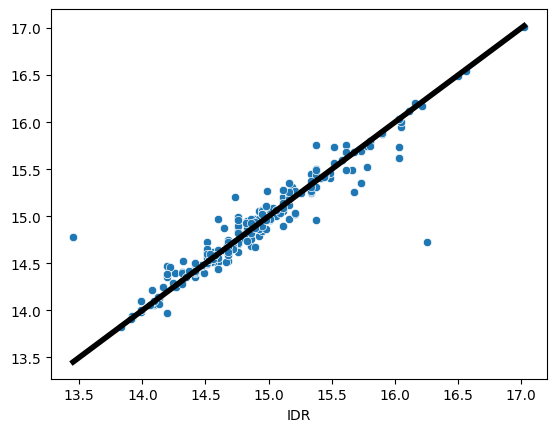

In [547]:
from xgboost import XGBRegressor

model = XGBRegressor(learning_rate=0.5, n_estimators=100, max_depth=4)

XGBR = Pipeline ([
    ('Encode', Encode),
    ('Model', model)
])

XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
y_pred

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

print('MAE:', MAE(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=4)
plt.show()

# RandomForestRegressor

MAE: 0.08801707729030274
R2: 0.8889119220169936


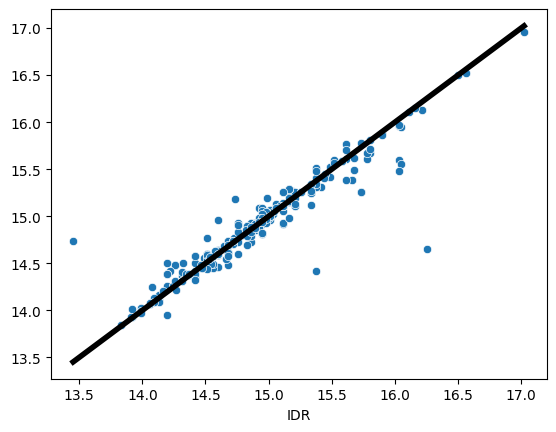

In [548]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, max_depth=600, max_features=10, random_state=2)

RF = Pipeline ([
    ('Encode', Encode),
    ('Model', model)
])

RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
y_pred

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

print('MAE:', MAE(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=4)
plt.show()

# GradientBoostRegressor

MAE: 0.09342721066984373
R2: 0.8830220366491216


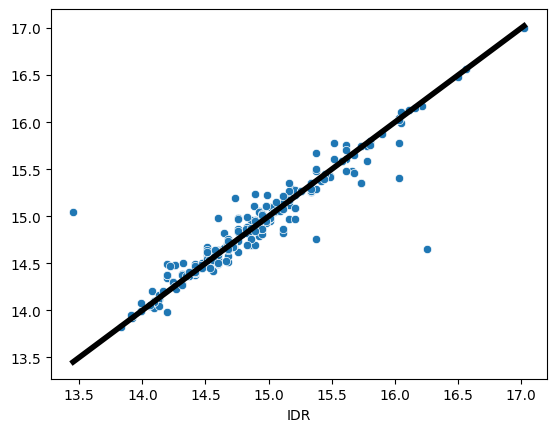

In [549]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(loss='squared_error', learning_rate=0.2, n_estimators=200, max_depth=4, random_state=2)

GBR = Pipeline ([
    ('Encode', Encode),
    ('Model', model)
])

GBR.fit(X_train,y_train)
y_pred = GBR.predict(X_test)
y_pred

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

print('MAE:', MAE(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=4)
plt.show()

# LinearRegression

MAE: 0.1779096579537753
R2: 0.7650555895796407


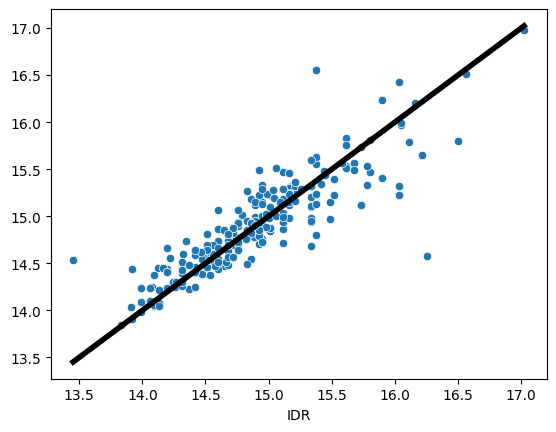

In [550]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

LR_pipe = Pipeline ([
    ('Encode', Encode),
    ('Model', model)
])

LR_pipe.fit(X_train,y_train)
y_pred = LR_pipe.predict(X_test)
y_pred

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

print('MAE:', MAE(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=4)
plt.show()

In [551]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(XGBR, open('model.pkl', 'wb'))